In [196]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [197]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


### There are no missing values as such

In [199]:
data['region'].value_counts().sort_values()

region
northeast    658
northwest    664
southwest    684
southeast    766
Name: count, dtype: int64

In [200]:
data['children'].value_counts().sort_values()

children
5      42
4      52
3     324
2     496
1     672
0    1186
Name: count, dtype: int64

### Converting Categorical Features to Numerical

In [201]:
clean_data = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
data_copy = data.copy()
data_copy.replace(clean_data, inplace=True)

In [202]:
data_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.492785,30.701349,1.101732,0.203463,1.530303,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.105489,12151.768945
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4687.797000
50%,39.000000,0.000000,30.447500,1.000000,0.000000,2.000000,9333.014350
75%,51.000000,1.000000,34.770000,2.000000,0.000000,2.000000,16577.779500
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


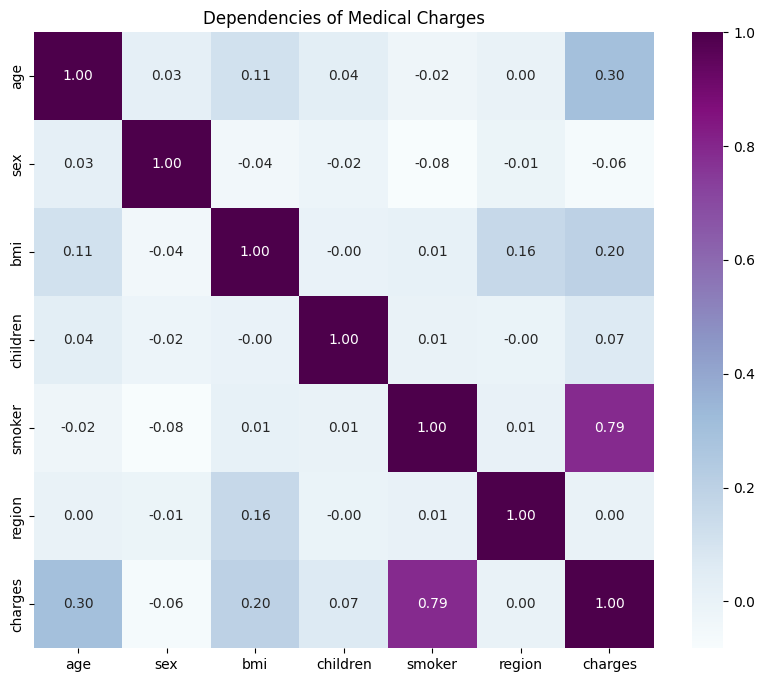

In [203]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Dependencies of Medical Charges")
plt.savefig('./sampleImages/Cor')
plt.show()

### Smoker, BMI and Age are most important factor that determnines - Charges
Also we see that Sex, Children and Region do not affect the Charges.
We might drop these 3 columns as they have less correlation

In [204]:
print(data['sex'].value_counts().sort_values()) 
print(data['smoker'].value_counts().sort_values())
print(data['region'].value_counts().sort_values())

sex
female    1366
male      1406
Name: count, dtype: int64
smoker
yes     564
no     2208
Name: count, dtype: int64
region
northeast    658
northwest    664
southwest    684
southeast    766
Name: count, dtype: int64


### Now we are confirmed that there are no other values in above pre-preocessed column, We can proceed with EDA

C:\Users\techi\AppData\Local\Temp\ipykernel_17336\1092289803.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age', y='charges', data=data_copy, palette='husl')


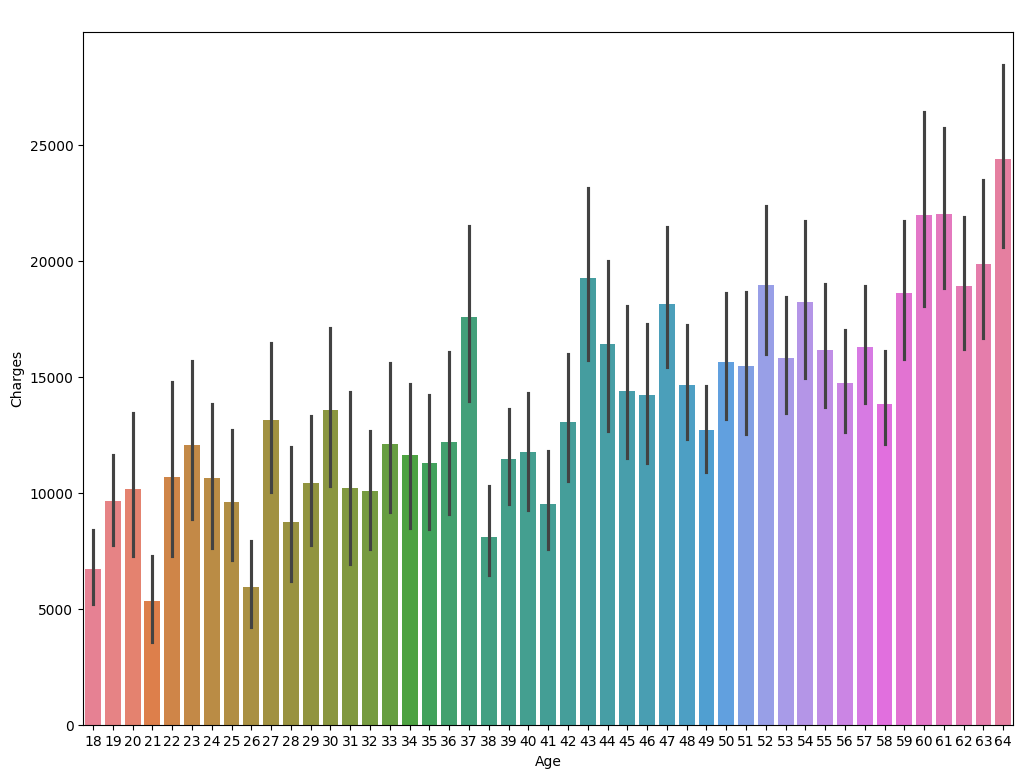

In [205]:
plt.figure(figsize=(12, 9))
plt.title('Age vs Charge', color='white')  # Set title color to white
sns.barplot(x='age', y='charges', data=data_copy, palette='husl')
plt.xlabel('Age', color='black')  # Set x-axis label color to white
plt.ylabel('Charges', color='black')  # Set y-axis label color to white
plt.xticks(color='black')  
plt.yticks(color='black') 
plt.savefig('./sampleImages/AgevsCharges', bbox_inches='tight')  
plt.show()

C:\Users\techi\AppData\Local\Temp\ipykernel_17336\448021243.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges',data=data_copy,palette='Set2')


<Axes: title={'center': 'Region vs Charge'}, xlabel='region', ylabel='charges'>

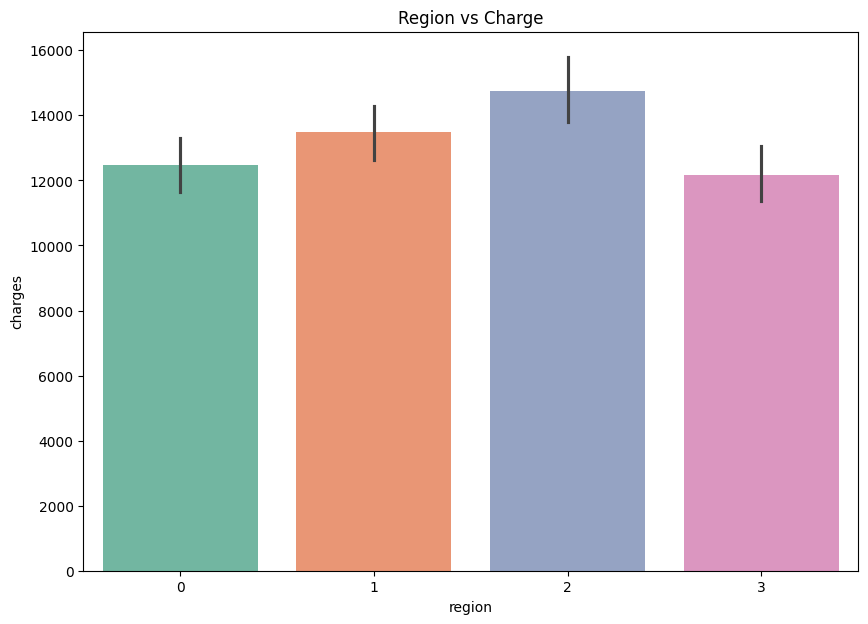

In [206]:
plt.figure(figsize=(10,7))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=data_copy,palette='Set2')

Text(0.5, 1.0, 'BMI VS Charge')

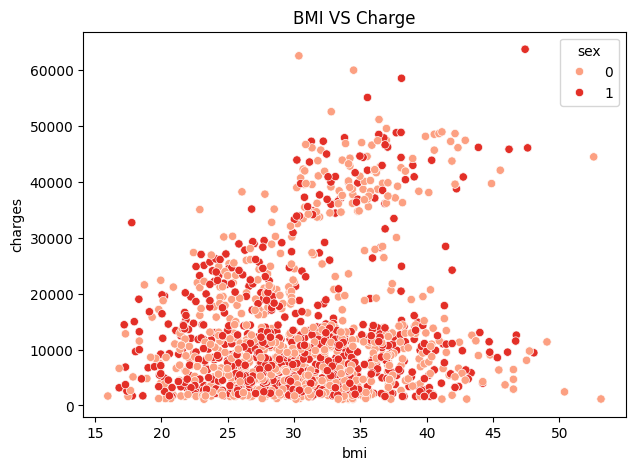

In [207]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=data_copy,palette='Reds')
plt.title('BMI VS Charge')

<Axes: title={'center': 'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

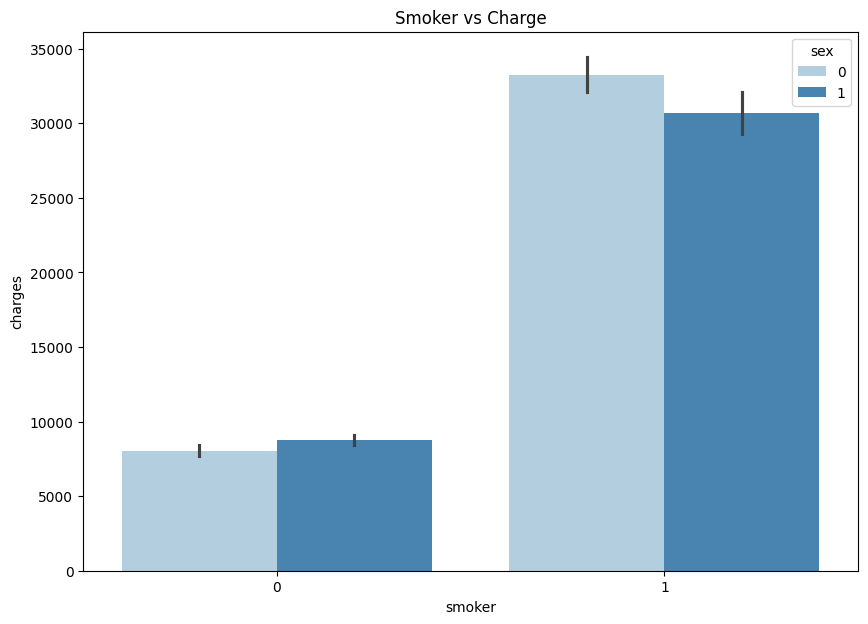

In [208]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=data_copy,palette='Blues',hue='sex')

C:\Users\techi\AppData\Local\Temp\ipykernel_17336\3378163740.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')


<Axes: title={'center': 'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

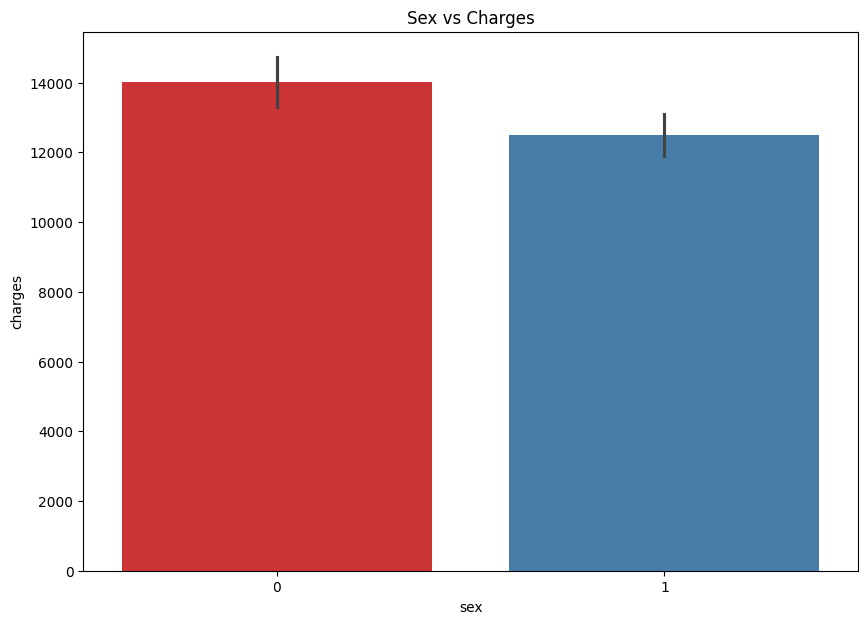

In [209]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=data_copy,palette='Set1')

### Plotting the distributions

C:\Users\techi\AppData\Local\Temp\ipykernel_17336\1236474692.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['age'])


Text(0, 0.5, 'Count')

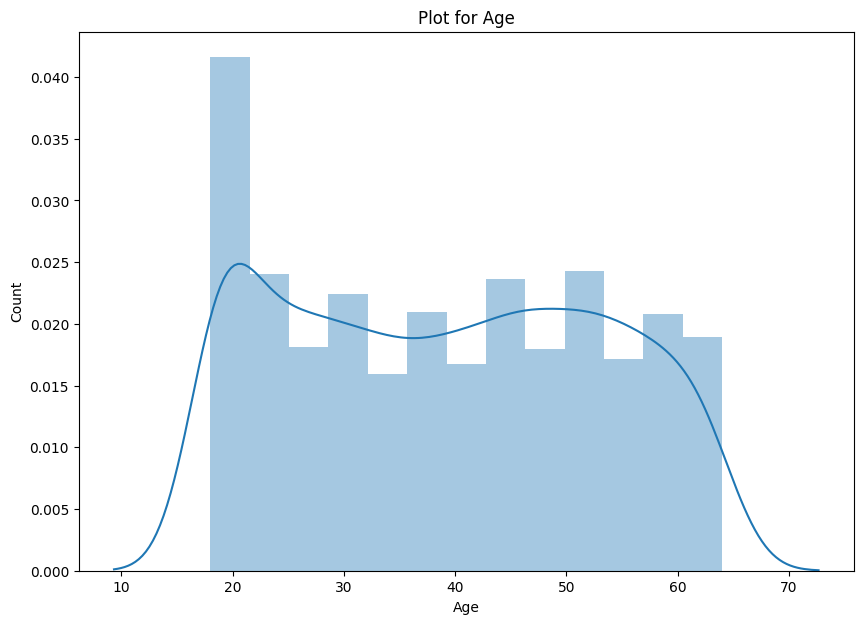

In [210]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

C:\Users\techi\AppData\Local\Temp\ipykernel_17336\3399011551.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['region'])


Text(0, 0.5, 'Count')

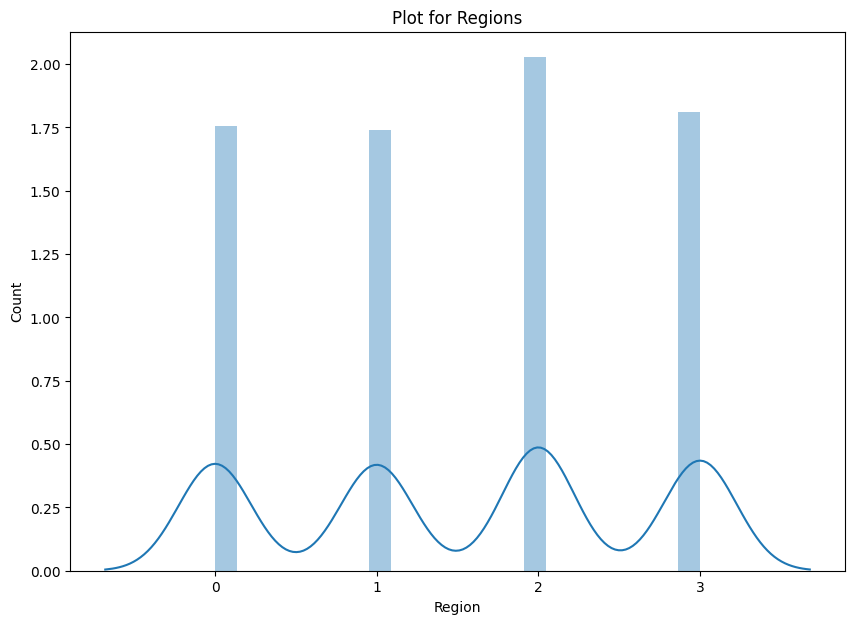

In [211]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['region'])
plt.title('Plot for Regions')
plt.xlabel('Region')
plt.ylabel('Count')

C:\Users\techi\AppData\Local\Temp\ipykernel_17336\149558255.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['bmi'])


Text(0, 0.5, 'Count')

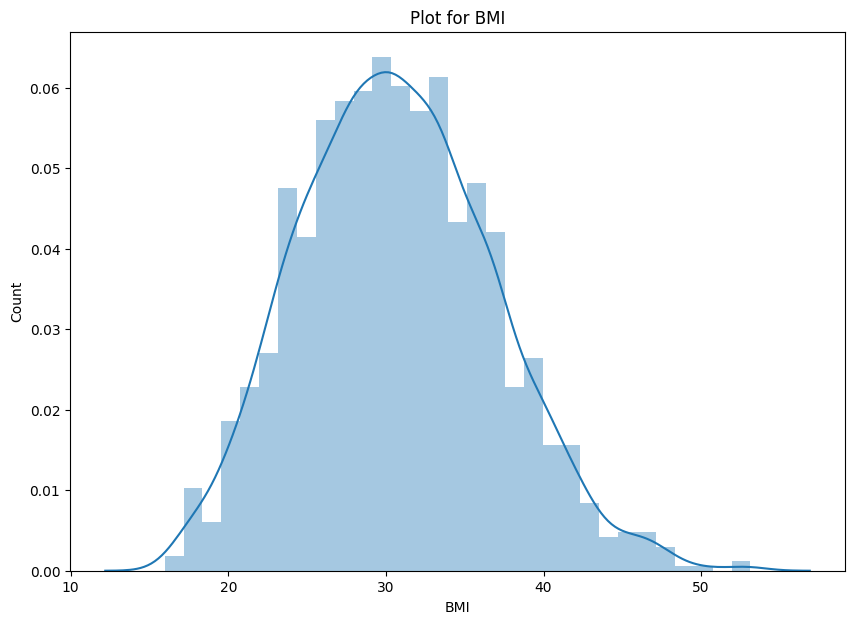

In [212]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

C:\Users\techi\AppData\Local\Temp\ipykernel_17336\3182067528.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['smoker'])


Text(0, 0.5, 'Count')

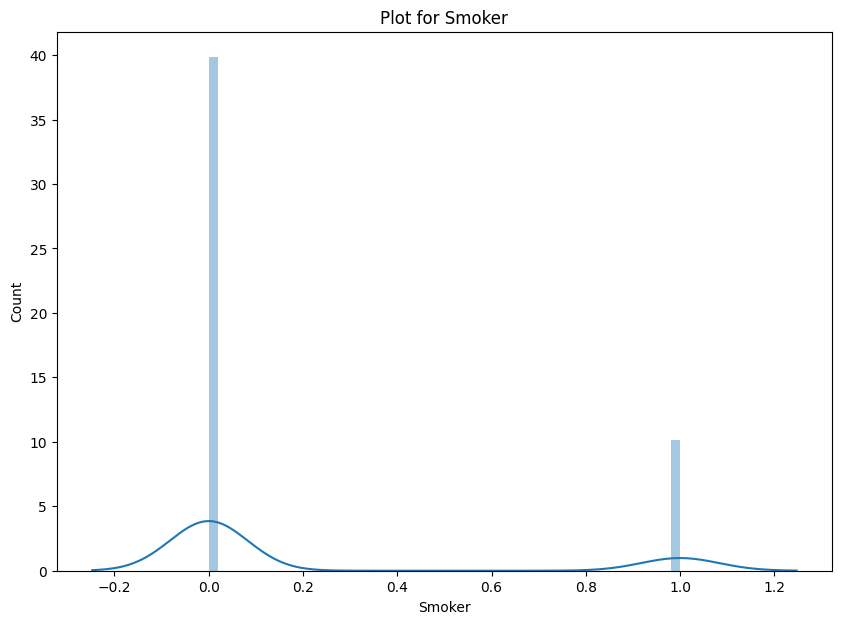

In [213]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['smoker'])
plt.title('Plot for Smoker')
plt.xlabel('Smoker')
plt.ylabel('Count')

C:\Users\techi\AppData\Local\Temp\ipykernel_17336\3614546085.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['sex'])


Text(0, 0.5, 'Count')

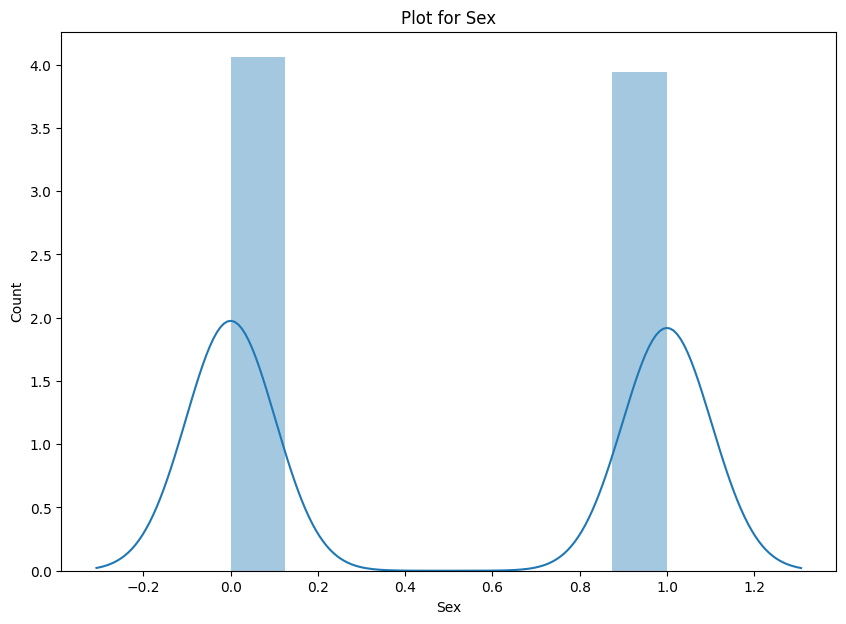

In [214]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['sex'])
plt.title('Plot for Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

C:\Users\techi\AppData\Local\Temp\ipykernel_17336\2885443911.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_copy['charges'])


Text(0, 0.5, 'Count')

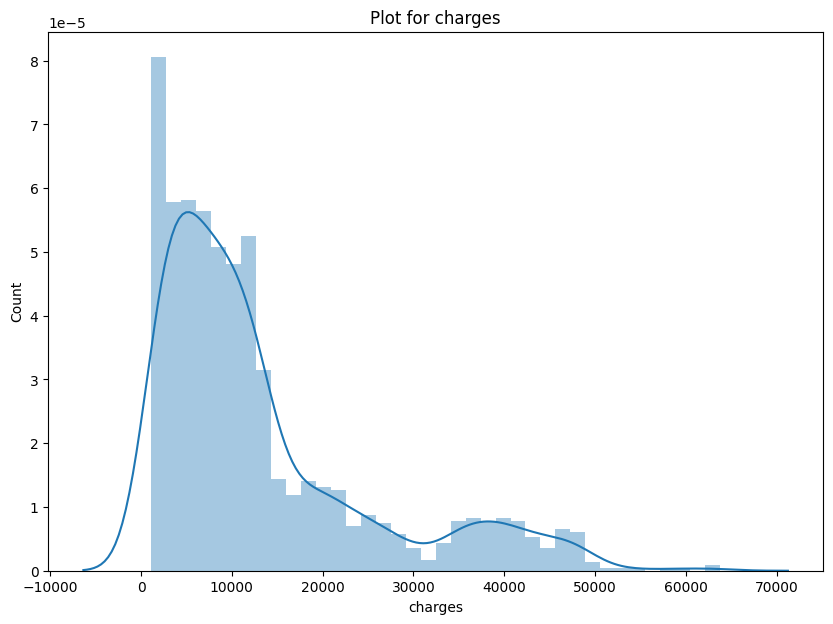

In [215]:
plt.figure(figsize=(10,7))
sns.distplot(data_copy['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

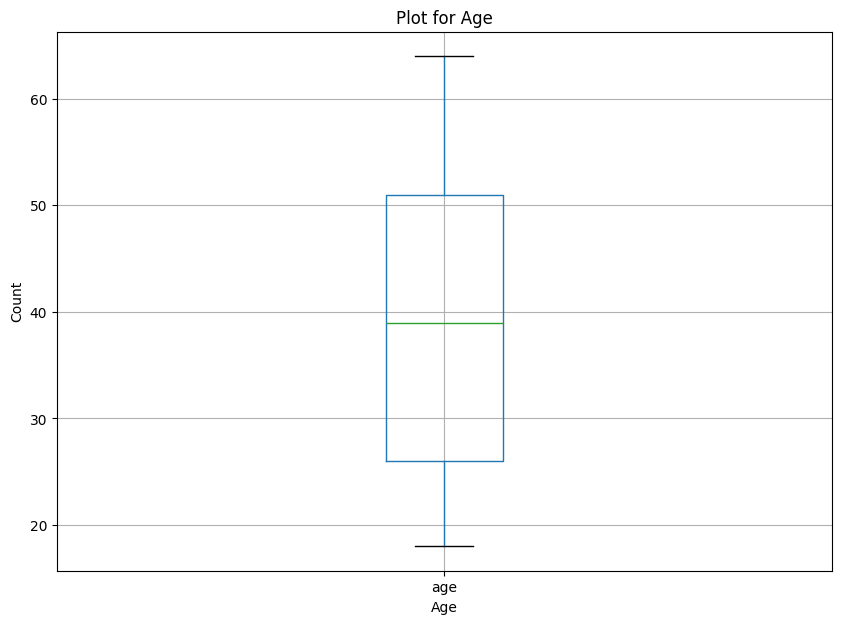

In [216]:
plt.figure(figsize=(10,7))
data_copy.boxplot(['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Count')

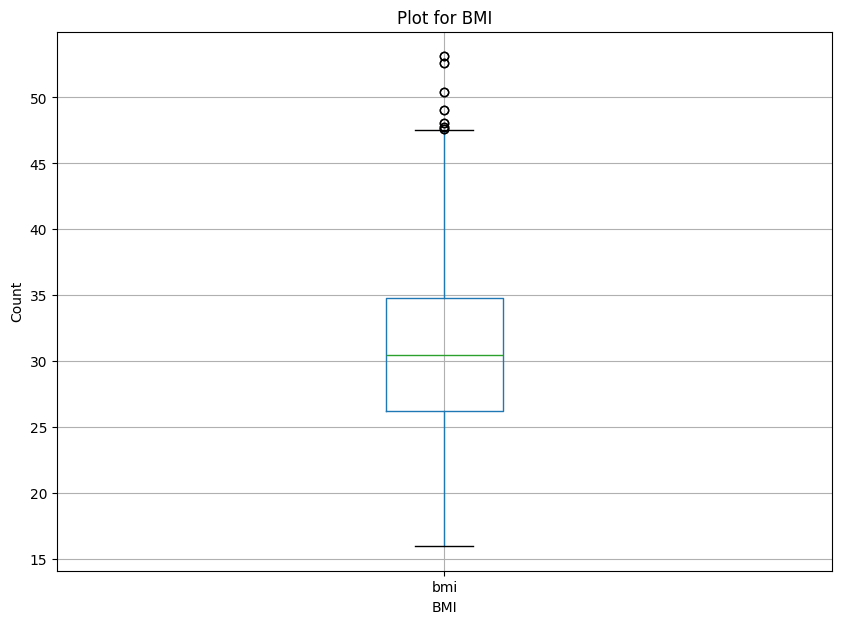

In [217]:
plt.figure(figsize=(10,7))
data_copy.boxplot(['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

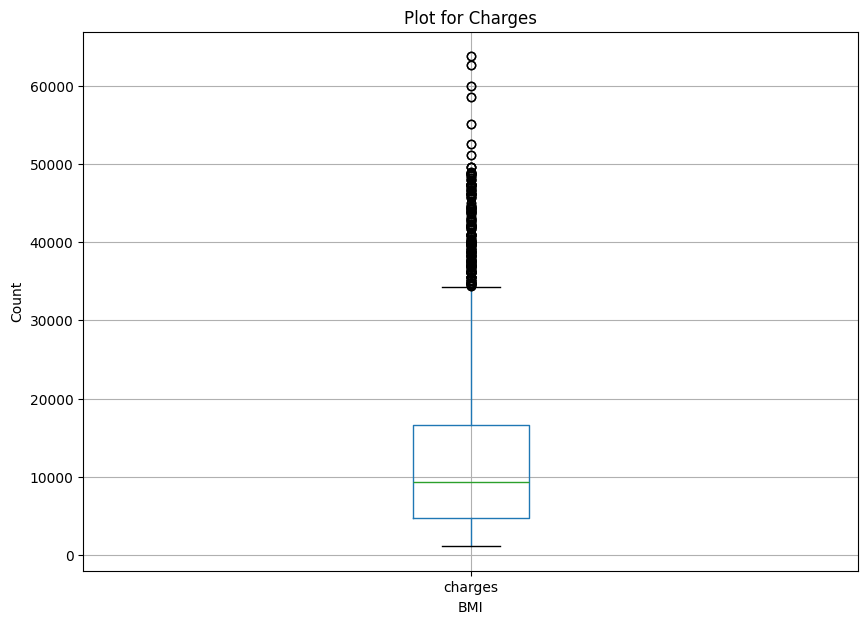

In [218]:
plt.figure(figsize=(10,7))
data_copy.boxplot(['charges'])
plt.title('Plot for Charges')
plt.xlabel('BMI')
plt.ylabel('Count')

# Data Preprocessing

In [219]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


y = data_copy['charges'].values
X = data_copy.drop('charges', axis=1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\techi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\techi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\techi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\techi\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in 

In [220]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2217, 6), (555, 6), (2217,), (555,))

In [221]:
X_train_scaled.min(),X_train_scaled.max()

(-2.418209333081673, 3.583288817143392)

In [222]:
X_test_scaled.min(),X_test_scaled.max()

(-2.418209333081673, 3.6734260094597166)

# Importing Models and Metrics

In [223]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from math import sqrt

## Linear Regression

In [224]:
linear_reg = LinearRegression()

In [225]:
cv_scores_linear = cross_val_score(estimator=linear_reg, X=X_train_scaled, y=y_train, cv=10)
cv_linear_score = cv_scores_linear.max()
y_pred_train_linear = linear_reg.fit(X_train_scaled, y_train).predict(X_train_scaled)
r2_train_linear = r2_score(y_train, y_pred_train_linear)

y_pred_test_linear = linear_reg.predict(X_test_scaled)
r2_test_linear = r2_score(y_test, y_pred_test_linear)

rmse_test_linear = np.sqrt(mean_squared_error(y_test, y_pred_test_linear))

print('CV Linear Regression: {0:.3f}'.format(cv_linear_score))
print('R2 score (train): {0:.3f}'.format(r2_train_linear))
print('R2 score (test): {0:.3f}'.format(r2_test_linear))
print('RMSE (test): {0:.3f}'.format(rmse_test_linear))

CV Linear Regression: 0.797
R2 score (train): 0.753
R2 score (test): 0.740
RMSE (test): 6319.232


## Ridge Regressor

In [226]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

pipeline_steps = [
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge())
]

ridge_pipeline = Pipeline(pipeline_steps)

In [227]:
parameters = {
    'model__alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 2, 5, 10, 20, 25, 35, 43, 55, 100],
    'model__random_state': [42]
}

ridge_grid_search = GridSearchCV(ridge_pipeline, parameters, cv=10)
ridge_grid_search.fit(X_train_scaled, y_train)

C:\Users\techi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.04797e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\techi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.0119e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\techi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.05562e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\techi\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.11831e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\tech

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('model', Ridge())]),
             param_grid={'model__alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1,
                                          2, 5, 10, 20, 25, 35, 43, 55, 100],
                         'model__random_state': [42]})

In [228]:
ridge_grid_search.best_estimator_, ridge_grid_search.best_score_

(Pipeline(steps=[('poly', PolynomialFeatures()),
                 ('model', Ridge(alpha=20, random_state=42))]),
 0.8411463367879763)

In [229]:
ridge = Ridge(alpha=20, random_state=42)
ridge.fit(X_train_scaled, y_train)

cv_ridge_score = ridge_grid_search.best_score_

y_pred_train_ridge = ridge.predict(X_train_scaled)
r2_train_ridge = r2_score(y_train, y_pred_train_ridge)

y_pred_test_ridge = ridge.predict(X_test_scaled)
r2_test_ridge = r2_score(y_test, y_pred_test_ridge)

rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))

print('Best CV R2 score: {0:.3f}'.format(cv_ridge_score))
print('R2 score (train): {0:.3f}'.format(r2_train_ridge))
print('R2 score (test): {0:.3f}'.format(r2_test_ridge))
print('RMSE (test): {0:.3f}'.format(rmse_test_ridge))

Best CV R2 score: 0.841
R2 score (train): 0.753
R2 score (test): 0.739
RMSE (test): 6323.797


## RandomForest Regressor

In [230]:
%%time

random_forest = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [600, 1000, 1200],
    'max_depth': [40, 50, 60],
    'min_samples_split': [5, 7, 9],
    'min_samples_leaf': [7, 10, 12],
    'criterion': ['squared_error'],
    'ccp_alpha': [0.0, 0.1, 0.2]
}

rf_grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    cv=10,
    n_jobs=-1,
    verbose=True
)

rf_grid_search.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


CPU times: total: 9.86 s
Wall time: 11min 18s


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2],
                         'criterion': ['squared_error'],
                         'max_depth': [40, 50, 60],
                         'min_samples_leaf': [7, 10, 12],
                         'min_samples_split': [5, 7, 9],
                         'n_estimators': [600, 1000, 1200]},
             verbose=True)

In [231]:
rf_grid_search.best_score_, rf_grid_search.best_estimator_

(0.8869454371561915,
 RandomForestRegressor(max_depth=40, min_samples_leaf=7, min_samples_split=5,
                       n_estimators=1200, random_state=42))

In [232]:
rf_reg = rf_grid_search.best_estimator_
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=40, min_samples_leaf=7, min_samples_split=5,
                      n_estimators=1200, random_state=42)

In [233]:
cv_rf_score = rf_grid_search.best_score_

rf_best_model = rf_grid_search.best_estimator_

y_pred_train_rf = rf_best_model.predict(X_train_scaled)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

y_pred_test_rf = rf_best_model.predict(X_test_scaled)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))

print('Best CV R2 score: {0:.3f}'.format(cv_rf_score))
print('R2 score (train): {0:.3f}'.format(r2_train_rf))
print('R2 score (test): {0:.3f}'.format(r2_test_rf))
print('RMSE (test): {0:.3f}'.format(rmse_test_rf))

Best CV R2 score: 0.887
R2 score (train): 0.922
R2 score (test): 0.882
RMSE (test): 4259.973


# KNN

In [234]:
# Initialize the KNeighborsRegressor
knn = KNeighborsRegressor()

# Define the parameter grid: n_neighbors, weights, and p
param_grid = {
    'n_neighbors': list(range(1, 300)),  # Using an even range as an example
    'weights': ['uniform', 'distance'],     # Uniform or weighted by distance
    'p':[1, 2]                             # Manhattan or Euclidean distance
}

# GridSearchCV with additional parameters and scoring metrics
knn_grid_search = GridSearchCV(knn, param_grid, cv=10, 
                               scoring='r2',  # You can also try other scoring metrics
                               n_jobs=-1, verbose=1)  # verbose=1 will show the progress
knn_grid_search.fit(X_train_scaled, y_train)

# Get the best score and estimator from the grid search
best_knn_model = knn_grid_search.best_estimator_
cv_knn_score = knn_grid_search.best_score_

# Make predictions with the best model
y_pred_train_knn = best_knn_model.predict(X_train_scaled)
y_pred_test_knn = best_knn_model.predict(X_test_scaled)

# Calculate R2 and RMSE
r2_train_knn = r2_score(y_train, y_pred_train_knn)
r2_test_knn = r2_score(y_test, y_pred_test_knn)
rmse_test_knn = sqrt(mean_squared_error(y_test, y_pred_test_knn))

print('Best Grid Search MSE:', cv_knn_score)
print('Best parameters:', knn_grid_search.best_params_)
print(f"Train R2 score: {r2_train_knn}")
print(f"Test R2 score: {r2_test_knn}")
print(f"Test RMSE: {rmse_test_knn}")


Fitting 10 folds for each of 1196 candidates, totalling 11960 fits
Best Grid Search MSE: 0.9493374280174554
Best parameters: {'n_neighbors': 44, 'p': 2, 'weights': 'distance'}
Train R2 score: 0.9997587266398212
Test R2 score: 0.9495922665056653
Test RMSE: 2781.4793160810923


In [235]:
print(best_knn_model)

KNeighborsRegressor(n_neighbors=44, weights='distance')


In [236]:
models = [('Linear Regression', rmse_test_linear, r2_train_linear, r2_test_linear, cv_linear_score),
          ('Ridge Regression', rmse_test_ridge, r2_train_ridge, r2_test_ridge, cv_ridge_score),
          ('Random Forest Regression', rmse_test_rf, r2_train_rf, r2_test_rf, cv_rf_score),
          ('KNN', rmse_test_knn, r2_train_knn, r2_test_knn, cv_knn_score)   
         ]

In [237]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(training)', 'R2_Score(test)', 'Cross-Validation'])
predict

,Model,RMSE,R2_Score(training),R2_Score(test),Cross-Validation
0,Linear Regression,6319.231693,0.752932,0.739820,0.797023
1,Ridge Regression,6323.797272,0.752870,0.739444,0.841146
2,Random Forest Regression,4259.973246,0.921583,0.881761,0.886945
3,KNN,2781.479316,0.999759,0.949592,0.949337


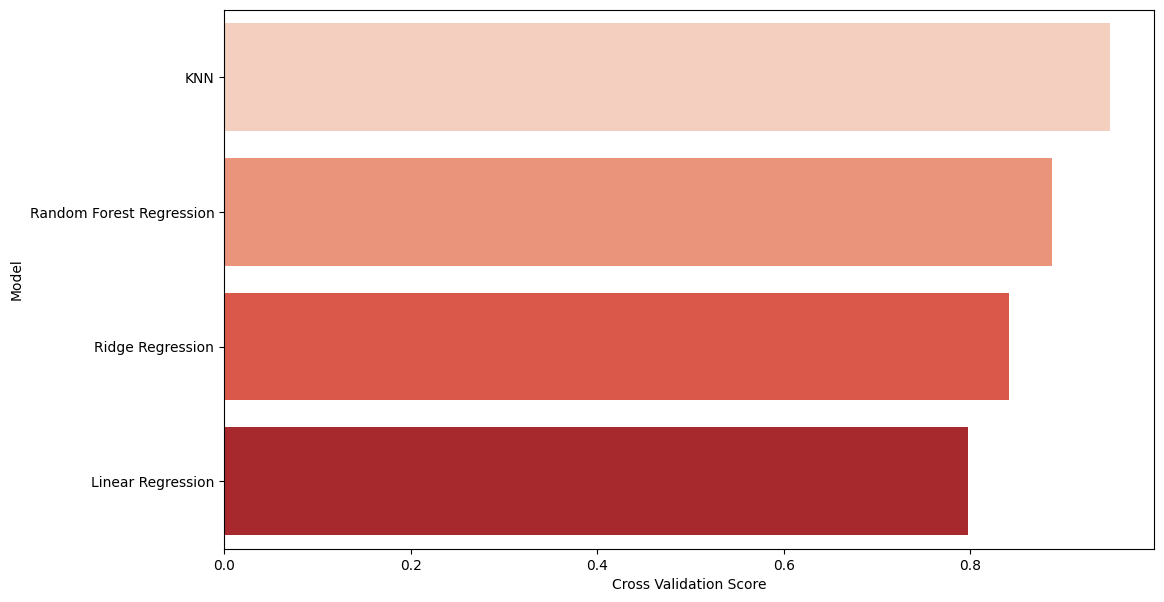

In [238]:
plt.figure(figsize=(12, 7))
predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)
sns.barplot(x='Cross-Validation', y='Model', data=predict, hue='Model', palette='Reds', dodge=False)
plt.xlabel('Cross Validation Score')
plt.ylabel('Model')
plt.show()

In [239]:
best_knn_model

KNeighborsRegressor(n_neighbors=44, weights='distance')

In [240]:
import pickle
# Here we are saving the model
with open("knn_tuned.pkl", 'wb') as file:  
    pickle.dump(best_knn_model, file)


In [241]:
# Load the Model back from file
with open("knn_tuned.pkl", 'rb') as file:  
    knn_tuned_loaded = pickle.load(file)

In [242]:
knn_tuned_loaded

KNeighborsRegressor(n_neighbors=44, weights='distance')